# Source Code and Utils Work

In [1]:
import time
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from typing import Tuple, Dict
from scipy.stats import loguniform
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.tree import DecisionTreeClassifier

script_folder = os.path.dirname(os.path.abspath("__file__"))
destination_path = os.path.join(script_folder, "data")

In [2]:
"""
In this we create some utils functions. Based on the idea that we do a monolith notebook they take place in this cell. As we further 
the notebook the utils functions here will be transfereed to a utlis/src directory as appropriate
"""

from enum import Enum

class Models(Enum):
    """
    Enum class to help with typing and auto completion in the IDE
    """
    GRADIENT_BOOSTING = 'Gradient Boosting',
    GAUSSIAN_NB = 'Gaussian Naive Bayes',
    LOG_REGRESSION = 'Logistic Regression',
    MLP_CLASSIFIER = 'MLP Classifier',
    KNN = 'KNN',
    RANDOM_FOREST = 'Random Forest',
    DECISION_TREE = 'Decision Tree',

class ModelFactory:
    """
    Factory class the implements methods for the creation of models and their search spaces. The Factory is by
    design stateless (not attributes that needs to be instantiated)
    """
    def generate_model_and_search_space(self, mdl_type: Models) -> Tuple:
        """
        Method that return the chosen model instance as well as a search space for optimization
        :param mdl_type: Type of model. If not implemented raise error.
        :return: Tuple of model
        """
        model = self._get_model(mdl_type)
        search_space = self._get_search_space(mdl_type)
        return model, search_space

    def _get_model(self, mdl_type: Models):
        if mdl_type == Models.GRADIENT_BOOSTING:
            return GradientBoostingClassifier(n_estimators=50,
                                                  learning_rate=0.09,
                                                  max_depth=5,
                                                  verbose=True)
        elif mdl_type == Models.GAUSSIAN_NB:
            return GaussianNB()
        elif mdl_type == Models.MLP_CLASSIFIER:
            return MLPClassifier(solver='adam',
                                     alpha=1e-5,
                                     hidden_layer_sizes=(5, 2),
                                     random_state=1,
                                     max_iter=1000,
                                     verbose=True)
        elif mdl_type == Models.KNN:
            return KNeighborsClassifier(n_neighbors=5)
        elif mdl_type == Models.RANDOM_FOREST:
            return RandomForestClassifier(n_estimators = 100)
        elif mdl_type == Models.DECISION_TREE:
            return DecisionTreeClassifier(random_state=42, max_depth=2)
        elif mdl_type == Models.LOG_REGRESSION:
            return linear_model.LogisticRegression()
        # solver = 'liblinear',C=10, penalty='l2', max_iter = 1000
        else:
            raise NotImplementedError

    def _get_search_space(self, mdl_type: Models):
        space = dict()
        if mdl_type == Models.GRADIENT_BOOSTING:
            warnings.warn("The search space for the {} has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.GAUSSIAN_NB:
            warnings.warn("The search space for the {} has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.MLP_CLASSIFIER:
            warnings.warn("The search space for the {} has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.KNN:
            warnings.warn("The search space for the {} has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.RANDOM_FOREST:
            space['bootstrap'] = [False, True]
            space['max_features'] = ['log2', 'sqrt']
            space['n_estimators'] = [50, 100, 150, 200]
            return space
        elif mdl_type == Models.DECISION_TREE:
            warnings.warn("The search space for the {} has not been implemented yet", mdl_type.value[0])
            return None
        elif mdl_type == Models.LOG_REGRESSION:
            space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
            space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
            space['C'] = [1, 10, 20, 50]
            return space
        else:
            raise NotImplementedError

class Timer(object):
    def __int__(self):
        self.start_time = 0
        self.end_time = 0
    def __enter__(self):
        self.start_time = 0
        self.start_time = time.time()
    def __exit__(self, exc_type, exc_val, exc_tb):
        self.end_time = 0
        self.end_time = time.time()
        print("Elapsed Time", self.end_time - self.start_time)

script_folder = os.path.dirname(os.path.abspath("__file__"))
destination_path = os.path.join(script_folder, "data")
factory = ModelFactory()
timer = Timer()

# Data Work 

### In this part of the workbook we load the data, inspect it and perpare the data for the the train/test split

## Data Visualization

In [3]:
df = pd.read_csv('data/forest_data.csv', index_col='Id')
target = 'Cover_Type'
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area                       int64
Soil_Type                             int64
Cover_Type                            int64
dtype: object

In [4]:
attributes = df.copy()
corr_matrix = attributes.corr()
corr_matrix[target].sort_values(ascending=False)

Cover_Type                            1.000000
Wilderness_Area                       0.203883
Slope                                 0.087722
Soil_Type                             0.076205
Vertical_Distance_To_Hydrology        0.075647
Elevation                             0.016090
Aspect                                0.008015
Hillshade_9am                        -0.010286
Horizontal_Distance_To_Hydrology     -0.010515
Hillshade_3pm                        -0.053399
Horizontal_Distance_To_Fire_Points   -0.089389
Hillshade_Noon                       -0.098905
Horizontal_Distance_To_Roadways      -0.105662
Name: Cover_Type, dtype: float64

Text(0.5, 1.0, 'Correlation Matrix')

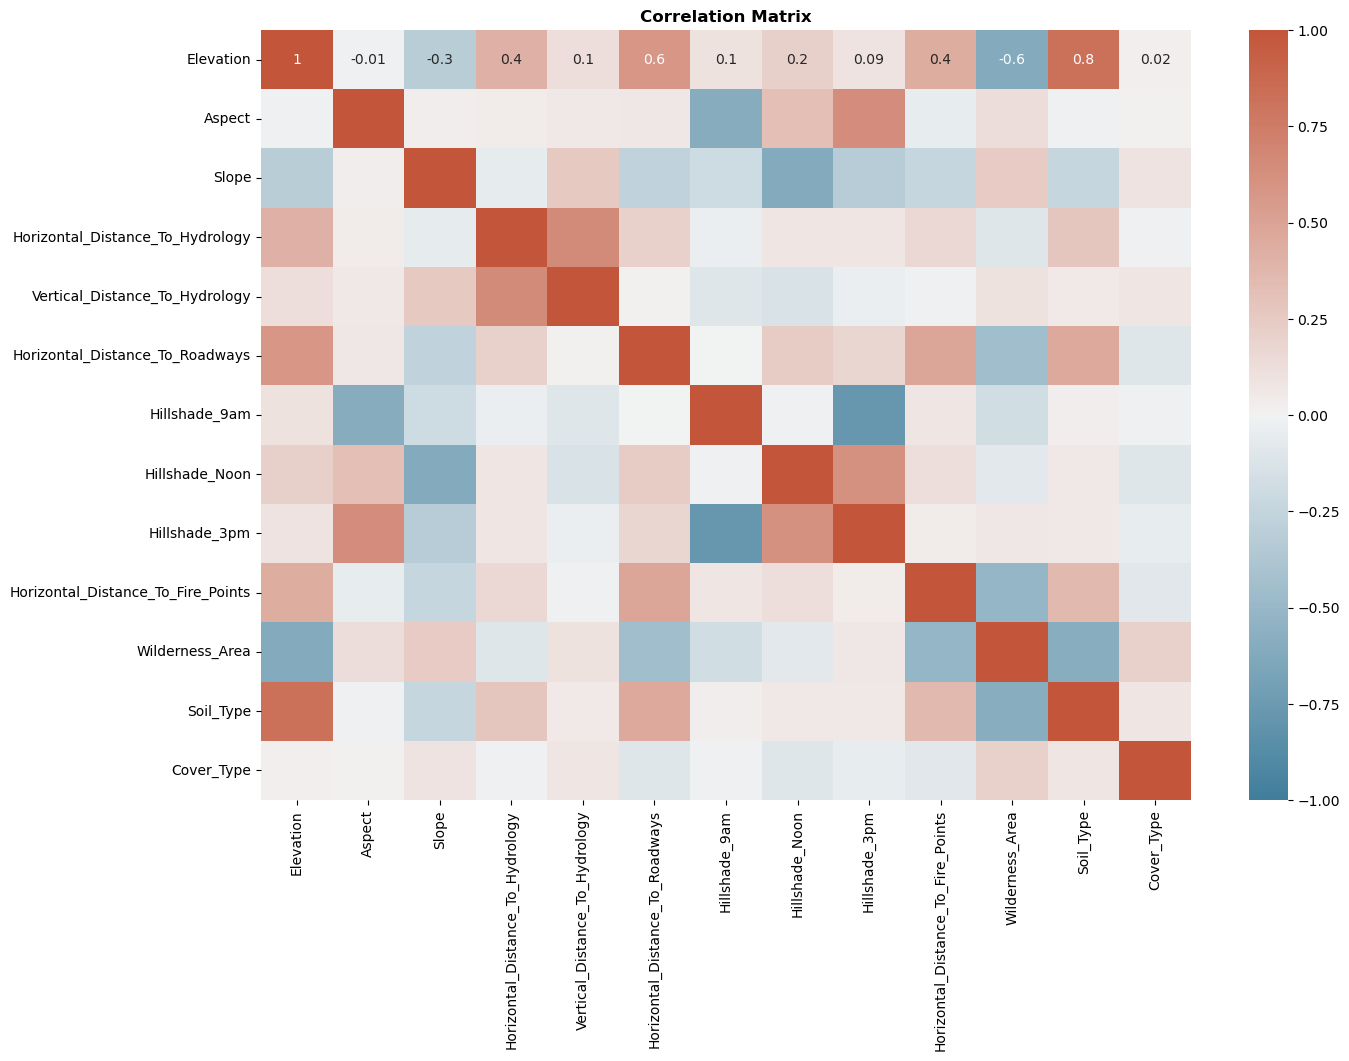

In [5]:
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(15, 10))
sns.heatmap(attributes.corr(), annot=True, fmt='.1g', vmin=-1, vmax=1, center=0, cmap=cmap)
plt.title("Correlation Matrix", fontweight='bold', fontsize='large')

## Split into Train/Test

In [6]:
df.dropna(inplace = True)
y = df[target]
X = df.drop(target, axis = 1)
X_train, X_test, y_train, y_test  = train_test_split(X, y, random_state = 42 )
X_train

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type
Id,,,,,,,,,,,,
4163,3052,195,16,361,72,1660,216,251,165,3598,1,22
7079,2630,151,13,30,-2,1215,237,239,130,785,3,2
7829,3388,24,15,524,149,3189,211,208,130,2103,3,39
9369,3377,357,18,577,192,4039,189,205,151,3606,3,40
643,2769,7,9,67,0,1832,209,222,150,2780,1,29
...,...,...,...,...,...,...,...,...,...,...,...,...
5192,2189,114,27,0,0,1464,254,200,55,525,4,2
13419,2317,124,5,0,0,595,229,236,140,560,4,17
5391,2962,153,15,95,23,1608,237,239,128,470,3,32


### Perfrom Basic Feature Engineering

In [7]:
cat_cols = ['Wilderness_Area', 'Soil_Type']
num_cols = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']

col_transformer = make_column_transformer(
        (OneHotEncoder(), cat_cols),
        remainder=StandardScaler())
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type'],
      dtype='object')

In [8]:
X_train_transformed = col_transformer.fit_transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

# Model Training 

### In this part we train two models with and without feature engineering and then perform a basic gridsearch 

## Base models

In [9]:
mdl_log_regression, search_space_log_regression = factory.generate_model_and_search_space(Models.LOG_REGRESSION)
mdl_random_forest, search_space_random_forest = factory.generate_model_and_search_space(Models.RANDOM_FOREST)

In [10]:
mdl_log_regression.fit(X_train, y_train)

/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
mdl_log_regression.score(X_train, y_train)

0.4882716049382716

In [12]:
mdl_log_regression.score(X_test, y_test)

0.4936507936507937

In [13]:
mdl_random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
mdl_random_forest.score(X_train, y_train)

1.0

In [15]:
mdl_random_forest.score(X_test, y_test)

0.8656084656084656

## Applying Feature Engineering 

In [16]:
mdl_log_regression, search_space_log_regression = factory.generate_model_and_search_space(Models.LOG_REGRESSION)
mdl_random_forest, search_space_random_forest = factory.generate_model_and_search_space(Models.RANDOM_FOREST)

In [17]:
mdl_log_regression.fit(X_train_transformed, y_train)

/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
mdl_log_regression.score(X_train_transformed, y_train)

0.7114638447971782

In [19]:
mdl_log_regression.score(X_test_transformed, y_test)

0.7137566137566138

In [20]:
mdl_random_forest.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [21]:
mdl_random_forest.score(X_train_transformed, y_train)

1.0

In [22]:
mdl_random_forest.score(X_test_transformed, y_test)

0.8693121693121693

## Applying Grid Search

In [23]:
with timer:
    search = GridSearchCV(mdl_log_regression, search_space_log_regression, n_jobs=2)
    search.fit(X_train_transformed, y_train)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/Users/oeladawy/opt/an

Best parameter (CV score=0.710):
{'C': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Elapsed Time 252.98055601119995


/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
with timer:
    search = GridSearchCV(mdl_random_forest, search_space_random_forest, n_jobs=2, error_score='raise')
    search.fit(X_train_transformed, y_train)
    print("Best parameter (CV score=%0.3f):" % search.best_score_)
    print(search.best_params_)

/Users/oeladawy/opt/anaconda3/envs/pop/lib/python3.10/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameter (CV score=0.859):
{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 150}
Elapsed Time 176.65748000144958
